In [2]:
%pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/78/a8/07dd10f90ca915ed914853cd57f79bfc22e1ef4384ab56cb4336d2fc1f2a/pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 340.1 kB/s eta 0:00:0000:0100:01
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip3.8 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os 
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp

# KeyPoints using MP holistic


In [2]:
mp_holistic = mp.solutions.holistic  # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [3]:
def mediapipe_detection(img,model) : 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = 0
    results = model.process(img)
    img.flags.writeable = 1
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img, results

In [4]:
def draw_landmarks(img,results):
    mp_drawing.draw_landmarks(img,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(img,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(img,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(img,results):
    # Draw face connections 
    mp_drawing.draw_landmarks(img,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                              # dots color
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              # connection lines color
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)
                              
                             )
    # Draw Body land marks 
    mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                              
                             )
    # Draw left hand landmarks
    mp_drawing.draw_landmarks(img,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)
                              )
    # Draw right hand landmarks
    mp_drawing.draw_landmarks(img,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                              )

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=.5,min_tracking_confidence=.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        # make detecitons 
        img, results = mediapipe_detection(frame,holistic)
        print(results)
        
        # drawing land marks
        draw_styled_landmarks(img,results)
         
        cv2.imshow('Video',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame,results)

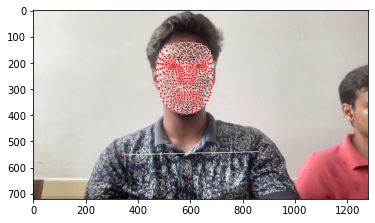

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [11]:
results.pose_landmarks.landmark[-1]

x: 0.4464262
y: 3.3384068
z: -0.2310969
visibility: 5.7860245e-05

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  
rh = np.array([[res.x,res.y,res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  

In [14]:
len(face)

1404

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  
    rh = np.array([[res.x,res.y,res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  
    return np.concatenate([pose,face,lh,rh])

In [16]:
extract_keypoints(results)[:10]

array([ 0.46549624,  0.3448627 , -0.73240769,  0.99995476,  0.49026865,
        0.27630672, -0.672732  ,  0.99989331,  0.50448   ,  0.27783874])

In [17]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Setup Folders for collection

In [71]:
#  Path fo exportinh data , numpy arrays
DATA_PATH = os.path.join('MP_DATA')

#  actions that we try to detect
actions  = np.array(['HELLO',"THANKS","VICTORY"])

# 30 videos worth of data
no_sequences= 30

#  videos are going to be 30 frames in length
sequence_lenght = 30 

In [72]:
 for action in actions:
        for sequence in range(no_sequences):
            try: 
                os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
            except:
                pass

# Collect keypoint values for training and testing

In [116]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=.5,min_tracking_confidence=.5) as holistic:
#     Loop through actions
    for action in actions:
#         loop through sequences aka videos
        for sequence in range(no_sequences):
#         Loop through video lrnght aka sequence length
            for frame_num in range(sequence_lenght):
            
                ret,frame = cap.read()

                # make detecitons 
                img, results = mediapipe_detection(frame,holistic)
                print(results)

                # drawing land marks
                draw_styled_landmarks(img,results)
                
#                  wait logic 
                if frame_num==0:
                    cv2.putText(img,'STARTING COLLECTING',(120,200),
                                cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1,cv2.LINE_AA)
                    cv2.putText(img,'Collecting Frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(img,'Collecting Frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)                    
#                 New export keypoints 
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
            
            
                cv2.imshow('Video',img)
                if cv2.waitKey(1) & 0xFF ==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [117]:
cap.release()
cv2.destroyAllWindows()


# Preprocess Data and Create Labels and features

In [118]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [119]:
label_map = {label:num for num ,label in enumerate(actions)}

In [120]:
label_map

{'HELLO': 0, 'THANKS': 1, 'VICTORY': 2}

In [121]:
sequencs, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_lenght):
            res= np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequencs.append(window)
        labels.append(label_map[action])

In [122]:
sequencs

[[array([ 0.48815089,  0.2904892 , -0.84113252, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48526931,  0.29165962, -0.60190284, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48317379,  0.29241878, -0.5893482 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48132616,  0.29253218, -0.59319443, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47964278,  0.2929886 , -0.59546161, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47804779,  0.29340294, -0.59142202, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47719145,  0.29366872, -0.58331269, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47699136,  0.295174  , -0.56408536, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47666818,  0.29581359, -0.59626698, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47643209,  0.30202436, -0.60847092, ...,  0.        ,
       

In [123]:
X = np.array(sequencs)

In [124]:
X.shape

(90, 30, 1662)

In [125]:
y = to_categorical(labels).astype(int)

In [126]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.05)

# Build and train LSTM Neural Networks

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [129]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [130]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,activation = "relu",input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation = "relu"))
model.add(LSTM(64,return_sequences=False,activation = "relu"))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [131]:
res = [.7,.2,.1]

In [132]:
actions[np.argmax(res)]

'HELLO'

In [133]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [134]:
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 28ms/step - loss: 1.5629 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 30ms/step - loss: 1.0822 - categorical_accuracy: 0.4471
Epoch 3/2000
3/3 [==============================] - 0s 31ms/step - loss: 1.1073 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 33ms/step - loss: 1.1149 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 0s 33ms/step - loss: 1.0296 - categorical_accuracy: 0.4353
Epoch 6/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.8867 - categorical_accuracy: 0.6706
Epoch 7/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.8898 - categorical_accuracy: 0.5529
Epoch 8/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.7413 - categorical_accuracy: 0.6235
Epoch 9/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.6931 - categorical_accuracy: 0.8824
E

KeyboardInterrupt: 

In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [136]:
res = np.argmax(model.predict(X_test))

1/1 [==============================] - 0s 443ms/step


res[0

In [137]:
y_hat = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [138]:
y_hat_labels = [np.argmax(i) for i in y_hat]

In [139]:
actions[np.argmax([y_test[1]])]

'VICTORY'

# Save Weights

In [140]:
model.save('Actions.keras')

In [141]:
model.load_weights('Actions.keras')

In [ ]:
import pickle
with open('Banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Evaluation using confusion Matrix and accuracy

In [142]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [143]:
yhat = model.predict(X_train)
ytrue = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

3/3 [==============================] - 0s 10ms/step


In [144]:
cm = multilabel_confusion_matrix(ytrue,yhat)

In [145]:
cm

array([[[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]]])

Text(69.0, 0.5, 'True')

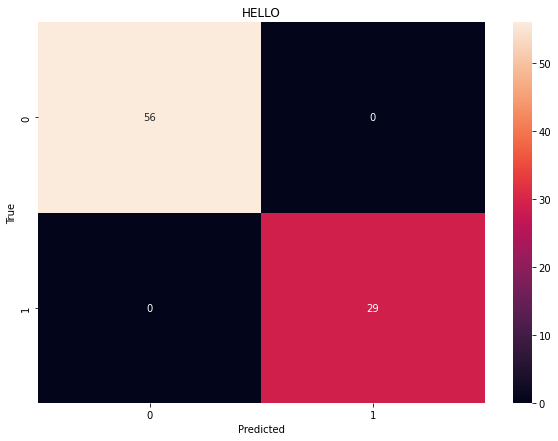

In [146]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm[0],annot=True,fmt='d')
plt.title("HELLO")
plt.xlabel('Predicted')
plt.ylabel('True')

Text(69.0, 0.5, 'True')

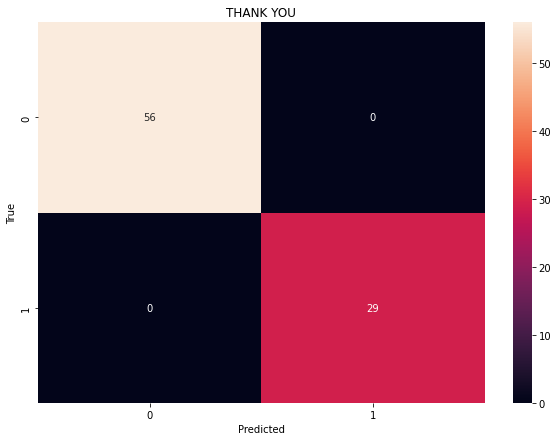

In [147]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm[1],annot=True,fmt='d')
plt.title("THANK YOU")
plt.xlabel('Predicted')
plt.ylabel('True')

Text(69.0, 0.5, 'True')

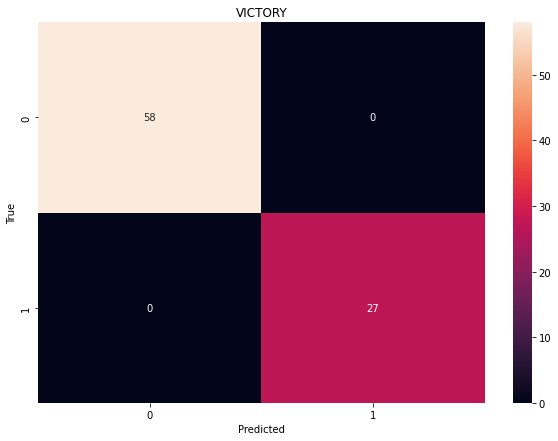

In [148]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm[2],annot=True,fmt='d')
plt.title("VICTORY")
plt.xlabel('Predicted')
plt.ylabel('True')

# test in real time

In [149]:
#  New detection variables
sequence = []
sentence = []
threshold=.4
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=.5,min_tracking_confidence=.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        # make detecitons 
        img, results = mediapipe_detection(frame,holistic)
#         print(results)
        
#         ########################### prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence  = sequence[:30]
        
        if len(sequence)==30:
            res = model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])

            
#          ###############   Viz logic ##################
        if res[np.argmax(res)] > threshold:
            if len(sentence) >0 :
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
        if len(sentence)>5:
            sentence  =sentence[-5:]
        
        cv2.rectangle(img,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(img,' '.join(sentence),(3,30),
                   cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2,cv2.LINE_AA)


        # #################################### drawing land marks
        draw_styled_landmarks(img,results)
         
        cv2.imshow('Video',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

IndexError: invalid index to scalar variable.

In [150]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)

In [151]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [152]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res,actions,img,colors))

TypeError: 'numpy.int64' object is not iterable

<Figure size 1296x1296 with 0 Axes>

In [153]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        img, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
#         draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # #### Viz probabilities
            img = prob_viz(res, actions, img, colors)
            
        cv2.rectangle(img, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(img, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', img)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'medi

1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'me

1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
THANKS
<class 'mediapipe.pyt

1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<clas

1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'medi

VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 

1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
HELLO
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
VICTORY
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [====